# Installation

In [ ]:
!pip3 install langchain
!pip3 install langchain-huggingface
!pip3 install langchain-community

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip3 install faiss-cpu # I can not directly import FAISS from langchain_community.vectorstores.faiss. But installing faiss-cpu does work.

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import time
import nltk
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from langchain.docstore.document import Document
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores.faiss import FAISS

# Open File

In [ ]:
path = 'TMDB_movie_dataset_v11.csv'
# ignore this line: data = pd.read_csv(path,quoting=csv.QUOTE_NONE)
# e_rows = [216863]
# if raise ParserError: Error tokenizing data. C error: EOF inside string starting at row 305768, add the denoted row number into e_rows
# then execute: data = pd.read_csv(file_path,skiprows=e_rows)


In [ ]:
data = pd.read_csv(path,on_bad_lines='skip')

In [ ]:
path_new = '../content/TMDB_movie_dataset_no_errline.csv'
data.to_csv(path_new, index=False)

In [ ]:
path_new = '../content/TMDB_movie_dataset_no_errline.csv'
data = pd.read_csv(path_new)

In [ ]:
pd.set_option('display.max_columns', None)
data.head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,/en971MEXui9diirXlogOrPKmsEn.jpg,58000000,https://www.20thcenturystudios.com/movies/dead...,tt1431045,en,Deadpool,The origin story of former Special Forces oper...,72.735,/zq8Cl3PNIDGU3iWNRoc5nEZ6pCe.jpg,Witness the beginning of a happy ending.,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English,"superhero, anti hero, mercenary, based on comi..."
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300000000,https://www.marvel.com/movies/avengers-infinit...,tt4154756,en,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa","sacrifice, magic, superhero, based on comic, s..."
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,63000000,http://www.foxmovies.com/movies/fight-club,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,69.498,/pB8BM7pdSp6B6Ih7QZ4Dr

# Dataset Pre-processing

## 1. checking duplicates & missing values

In [ ]:
# check for any duplicates
data.duplicated().sum()

np.int64(371)

In [ ]:
# drop them (small number)
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [ ]:
# check for any missing values
data.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             214280
revenue                       0
runtime                       0
adult                         0
backdrop_path            886169
budget                        0
homepage                1073734
imdb_id                  582465
original_language             0
original_title               13
overview                 251725
popularity                    0
poster_path              390578
tagline                 1031874
genres                   492703
production_companies     665343
production_countries     544407
spoken_languages         523639
keywords                 882535
dtype: int64

## 1. filtering by titile, release_date, status and run_time

In [ ]:
# remove movies with unkown titles
data = data[~data['title'].isnull()]
data['title'].isnull().sum()

np.int64(0)

In [ ]:
# process title
data['title'] = data['title'].str.strip().str.lower()

In [ ]:
# convert release_date to datetime and extract year
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'].dt.year.value_counts().sort_index()

release_date
1800.0    2
1837.0    1
1865.0    3
1867.0    1
1874.0    1
         ..
2061.0    1
2069.0    1
2074.0    1
2085.0    1
2099.0    1
Name: count, Length: 166, dtype: int64

In [ ]:
# remove the rows with release year before 1900 and after 2024
data = data[data['release_date'].dt.year > 1899]
data = data[data['release_date'].dt.year < 2025]

In [ ]:
# check any status under the 'status' column
data['status'].value_counts()

status
Released           967888
In Production        5451
Post Production      2415
Planned               618
Canceled               12
Rumored                 9
Name: count, dtype: int64

In [ ]:
# filter out rows with status != Released
data = data[data['status']=='Released']
data['status'].value_counts()

status
Released    967888
Name: count, dtype: int64

In [ ]:
data['runtime'].describe()

count    967888.000000
mean         53.096772
std          62.953821
min           0.000000
25%           3.000000
50%          43.000000
75%          90.000000
max       14400.000000
Name: runtime, dtype: float64

In [ ]:
# quite a large number, so don't remove them simply
data[data['runtime'] <= 15].shape[0]

389299

In [ ]:
data[data['runtime'] >= 360].shape[0]

1648

In [ ]:
# remove rows with runtime value to be 0 or longer than 360
data = data[(data['runtime'] < 360)&(data['runtime'] != 0)]
data['runtime'].value_counts().sort_index()

runtime
1       7802
2       9599
3      14285
4      12881
5      14480
       ...  
355       10
356       12
357       12
358       11
359       18
Name: count, Length: 359, dtype: int64

## 3. selecting features




In [ ]:
data['runtime'].describe()

count    753425.000000
mean         66.925997
std          49.546483
min           1.000000
25%          17.000000
50%          73.000000
75%          96.000000
max         359.000000
Name: runtime, dtype: float64

In [ ]:
data.overview[:5]

0    Cobb, a skilled thief who commits corporate es...
1    The adventures of a group of explorers who mak...
2    Batman raises the stakes in his war on crime. ...
3    In the 22nd century, a paraplegic Marine is di...
4    When an unexpected enemy emerges and threatens...
Name: overview, dtype: object

In [ ]:
data.tagline[:5]

0                 Your mind is the scene of the crime.
1    Mankind was born on Earth. It was never meant ...
2                    Welcome to a world without rules.
3                          Enter the world of Pandora.
4                              Some assembly required.
Name: tagline, dtype: object

In [ ]:
data.genres[:5]

0             Action, Science Fiction, Adventure
1              Adventure, Drama, Science Fiction
2                 Drama, Action, Crime, Thriller
3    Action, Adventure, Fantasy, Science Fiction
4             Science Fiction, Action, Adventure
Name: genres, dtype: object

In [ ]:
data.keywords[:5]

0    rescue, mission, dream, airplane, paris, franc...
1    rescue, future, spacecraft, race against time,...
2    joker, sadism, chaos, secret identity, crime f...
3    future, society, culture clash, space travel, ...
4    new york city, superhero, shield, based on com...
Name: keywords, dtype: object

In [ ]:
# half of the rows have an average score to be 0
data.vote_average.describe()

count    753425.000000
mean          2.409493
std           3.190258
min           0.000000
25%           0.000000
50%           0.000000
75%           5.600000
max          10.000000
Name: vote_average, dtype: float64

In [ ]:
# this column can be dropped
data.vote_count.describe()

count    753425.000000
mean         28.298981
std         390.871510
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       34495.000000
Name: vote_count, dtype: float64

In [ ]:
# select features
features = data[['id', 'title', 'vote_average', 'release_date', 'runtime', 'adult', 'original_language', 'overview', 'tagline', 'genres', 'keywords']]
features.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,genres,keywords
0,27205,inception,8.364,2010-07-15,148,False,en,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc..."
1,157336,interstellar,8.417,2014-11-05,169,False,en,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,..."
2,155,the dark knight,8.512,2008-07-16,152,False,en,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f..."
3,19995,avatar,7.573,2009-12-15,162,False,en,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ..."
4,24428,the avengers,7.710,2012-04-25,143,False,en,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com..."


## 4. saving features

In [ ]:
path_feature = '../content/features_file.csv'
features.to_csv(path_feature, index=False)

In [ ]:
path_feature = '../content/features_file.csv'
features = pd.read_csv(path_feature)

# Features Processing

## 1. handling missing value

In [ ]:
features.isnull().sum()

id                        0
title                     2
vote_average              0
release_date              0
runtime                   0
adult                     0
original_language         0
overview              31044
tagline              618762
genres               225485
keywords             494830
dtype: int64

In [ ]:
# remove movies with unkown titles
features = features[~features['title'].isnull()]
features['title'].isnull().sum()

np.int64(0)

In [ ]:
features['genres'].fillna('unknown', inplace=True)
features['genres'].isnull().sum()

/var/folders/5h/3cqj29ds1jg67b8b15k1kjw80000gn/T/ipykernel_45693/1413600530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['genres'].fillna('unknown', inplace=True)


np.int64(0)

In [ ]:
features['tagline'].fillna('unknown', inplace=True)
features['tagline'].isnull().sum()

/var/folders/5h/3cqj29ds1jg67b8b15k1kjw80000gn/T/ipykernel_45693/3786356618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['tagline'].fillna('unknown', inplace=True)


np.int64(0)

In [ ]:
features['keywords'].fillna('unknown', inplace=True)
features['keywords'].isnull().sum()

/var/folders/5h/3cqj29ds1jg67b8b15k1kjw80000gn/T/ipykernel_45693/2301597093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['keywords'].fillna('unknown', inplace=True)


np.int64(0)

In [ ]:
features.dropna(inplace=True)
features.isnull().sum()

id                   0
title                0
vote_average         0
release_date         0
runtime              0
adult                0
original_language    0
overview             0
tagline              0
genres               0
keywords             0
dtype: int64

## 2. original_language processing

In [ ]:
replace_values = {
    'en':'English','fr':'French','zh':'Chinese','it':'Italian','fa':'Persian','nl':'Dutch','de':'German','ar':'Arabic','es':'Spanish','hr':'Croatian',
    'ru':'Russian','mk':'Macedonian','ja':'Japanese','sv':'Swedish','ko':'Korean','sr':'Serbian','bn':'Bengali','he':'Hebrew','pt':'Portuguese','wo':'wolof','hu':'Hungarian',
    'cy':'Welch','vi':'Vietnamese','tr':'Turkish','pl':'Polish','cs':'Czech','da':'Danish','no':'Norwegian','ka':'Gerogian','nb':'Norwegian','hi':'Hindi',
    'el':'Greek','sh':'Serbo_Crotian','ta':'Tamil','bo':'Tibetian','ca':'Catalan','ab':'Abkhazian','fi':'Finnish','th':'Thai','sk':'Slovak','bs':'Bosnian','is':'Icelandic',
    'sl':'Slovenian','ps':'Pashto','eo':'Esperanto','se':'Sami','ro':'Romanian','mn':'Mangolian','aa':'Afar','dz':'Bhutani','hy':'Aremnian','id':'Indonesian',
    'zu':'Zulu','uk':'Ukranian','af':'Afrikaans','la':'Latin','et':'Estonian','lt':'Lithuanian','ku':'Kurdish','fy':'Frisian','lv':'Latvian','tl':'Tagalog','ur':'Urdu',
    'rw':'Kinyarwanda','bg':'Bulgarian','mr':'Marathi','eu':'Basque','kk':'Kazakah','ms':'Malay','qu':'Quechua','uz':'Uzbek','te':'Telugu','pa':'Punjabi','am':'Amharic',
    'sq':'Albanian','tg':'Tajik','ml':'Malayalam','ln':'Lingala','lo':'Laothian','ay':'Aymara','kn':'Kannada','ne':'Nepali','ky':'Kirghiz',
    'gl':'Galician','sm':'Samoan','mt':'Maltese','iu':'Inuktitut','fo':'Faeroese','si':'Sighalese','yi':'Yiddish','xh':'Xhosa','km':'Cambodian',
    'gu':'Gujarati','sw':'Swahili','sn':'Shona','as':'Assamese','cn':'Cantonese'}

In [ ]:
features = features.replace({"original_language": replace_values})

In [ ]:
# retain rows with top50 original_language counts
idx = features['original_language'].value_counts()
idx_set = idx[idx >= 50].index
features = features[features['original_language'].isin(idx_set)]

In [ ]:
features = features[features['original_language'].isin(replace_values.values())]

In [ ]:
features['original_language'].value_counts()

original_language
English     439847
Japanese     36688
French       32366
Spanish      30485
German       19893
             ...  
Tibetian        71
Welch           70
Sami            57
Yiddish         56
wolof           54
Name: count, Length: 77, dtype: int64

## 3. release_date processing

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716049 entries, 0 to 753424
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 716049 non-null  int64  
 1   title              716049 non-null  object 
 2   vote_average       716049 non-null  float64
 3   release_date       716049 non-null  object 
 4   runtime            716049 non-null  int64  
 5   adult              716049 non-null  bool   
 6   original_language  716049 non-null  object 
 7   overview           716049 non-null  object 
 8   tagline            716049 non-null  object 
 9   genres             716049 non-null  object 
 10  keywords           716049 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 60.8+ MB


In [ ]:
features.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,genres,keywords
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc..."
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,..."
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f..."
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ..."
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com..."


In [ ]:
def get_era(row):
    if row['release_date'].year < 1927:
        return 'The Silent Era'
    elif row['release_date'].year < 1960:
        return 'Golden Age'
    elif row['release_date'].year < 1980:
        return 'Post-War Era'
    elif row['release_date'].year < 1990:
        return 'Blockbuster Era'
    else:
        return 'Digital Era'

In [ ]:
# get era column
features['release_date'] = pd.to_datetime(features['release_date'])
features['era'] = features.apply(get_era, axis=1)
features.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,genres,keywords,era
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Digital Era
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Digital Era
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Digital Era
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Digital Era
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Digital Era


In [ ]:
features.era.value_counts()

era
Digital Era        543100
Post-War Era        63260
Golden Age          49396
Blockbuster Era     45165
The Silent Era      15128
Name: count, dtype: int64

Graph: pie chart of movie era

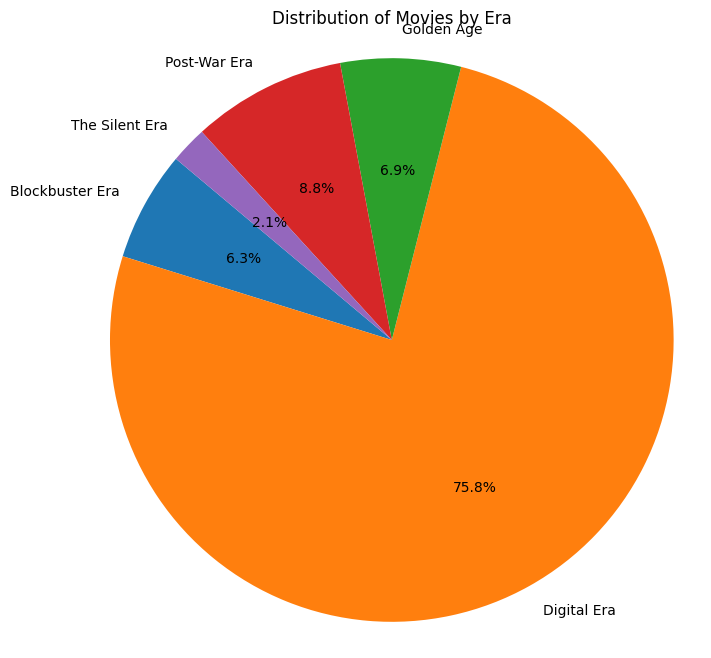

In [ ]:
era_counts = features['era'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(era_counts, labels=era_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Era')
plt.axis('equal')
plt.show()

## 4. run_time processing

In [ ]:
def get_runtime(row):
    if row['runtime'] < 40:
        return 'Short Film'
    elif row['runtime'] < 60:
        return 'Featurette'
    elif row['runtime'] < 120:
        return 'Feature Film'
    elif row['runtime'] < 180:
        return 'Extended Feature Film'
    else:
        return 'Epic Length Film'

In [ ]:
# get runtime_type column
features['runtime_type'] = features.apply(get_runtime, axis=1)
features.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,genres,keywords,era,runtime_type
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Digital Era,Extended Feature Film
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Digital Era,Extended Feature Film
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Digital Era,Extended Feature Film
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Digital Era,Extended Feature Film
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Digital Era,Extended Feature Film


In [ ]:
features.runtime_type.value_counts()

runtime_type
Feature Film             325887
Short Film               250806
Extended Feature Film     67463
Featurette                55820
Epic Length Film          16073
Name: count, dtype: int64

In [ ]:
features.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,genres,keywords,era,runtime_type
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Digital Era,Extended Feature Film
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Digital Era,Extended Feature Film
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Digital Era,Extended Feature Film
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Digital Era,Extended Feature Film
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Digital Era,Extended Feature Film


## 5. get dummy variables

In [ ]:
# use dummy variables to convert categorical variables into numerical variables
# features_new = pd.get_dummies(features, columns=['era', 'runtime_type'], drop_first=False)
features_new = pd.get_dummies(features, columns=['era', 'runtime_type'], drop_first=False)
features_new.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,genres,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False


In [ ]:
features_new = pd.concat([features_new.reset_index(drop=True), features[['era', 'runtime_type']].reset_index(drop=True)], axis=1)
features_new.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,genres,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film


## 6. genres pre-processing

In [ ]:
features_new.genres.head()

0             Action, Science Fiction, Adventure
1              Adventure, Drama, Science Fiction
2                 Drama, Action, Crime, Thriller
3    Action, Adventure, Fantasy, Science Fiction
4             Science Fiction, Action, Adventure
Name: genres, dtype: object

In [ ]:
# make a list of genres in each row
genre_lst = features_new['genres'].apply(lambda x: x.split(', '))
genre_lst.head()

0             [Action, Science Fiction, Adventure]
1              [Adventure, Drama, Science Fiction]
2                 [Drama, Action, Crime, Thriller]
3    [Action, Adventure, Fantasy, Science Fiction]
4             [Science Fiction, Action, Adventure]
Name: genres, dtype: object

In [ ]:
genre_lst = genre_lst.to_list()

In [ ]:
# get the overall genres list gen_lst, which contatins all genres that appear in dataset
gen_lst = [g for g_l in genre_lst for g in g_l ]
gen_lst_df = pd.Series(gen_lst)
gen_lst_df.value_counts()

unknown            211855
Drama              171820
Documentary        121291
Comedy             103407
Animation           45765
Horror              42979
Romance             42189
Thriller            37289
Action              35029
Music               32962
Crime               26565
Family              20604
TV Movie            18592
Adventure           18415
Fantasy             17790
Science Fiction     17484
Mystery             15662
History             12258
War                  8195
Western              7253
Name: count, dtype: int64

In [ ]:
graph: word cloud of genres

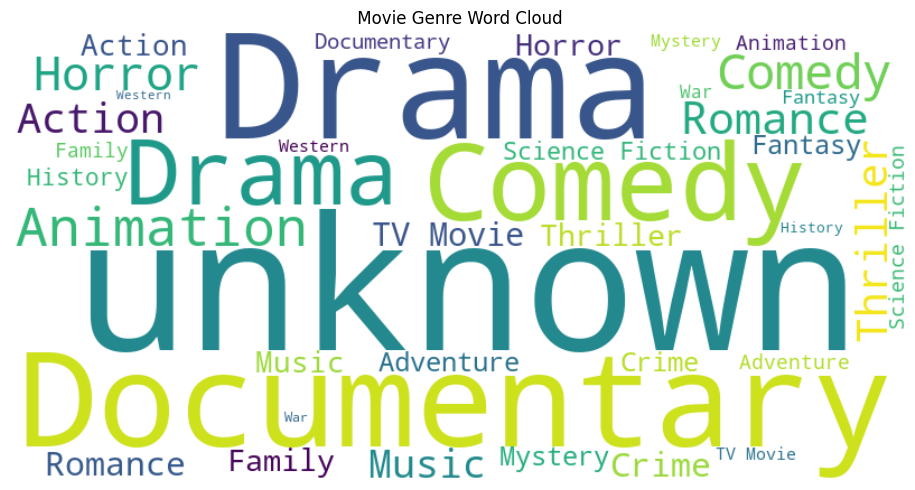

In [ ]:
from collections import Counter
from wordcloud import WordCloud
all_genres = ','.join(features_new['genres'].dropna())

words = all_genres.split(',')

# Count the frequency of each word
frequency = Counter(words)

# Sort the items by frequency in descending order
sorted_frequency = sorted(frequency.items(), key=lambda item: item[1], reverse=True)

genre_dict = dict(sorted_frequency)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', repeat = False ).generate_from_frequencies(genre_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title(" Movie Genre Word Cloud")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# only 20 generes, so we can directly encode genres into dummy variables
genre_classes = list(set(gen_lst))
mlb = MultiLabelBinarizer(classes=genre_classes)
gen_encoded = mlb.fit_transform(genre_lst)
gen_encoded[:10]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
# mlb.classes_

In [ ]:
gen_encoded_df = pd.DataFrame(gen_encoded, columns=mlb.classes_)
gen_encoded_df.head()

,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
# ensure 'genres' column is present before dropping it
# add dummy variables for generes
if 'genres' in features_new.columns:
		features_new.drop('genres', axis=1, inplace=True)
features_encoded = pd.concat([features_new.reset_index(drop=True), gen_encoded_df.reset_index(drop=True)], axis=1)
features_encoded.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## 7. key_words processing

In [ ]:
features_new.keywords.head()

0    rescue, mission, dream, airplane, paris, franc...
1    rescue, future, spacecraft, race against time,...
2    joker, sadism, chaos, secret identity, crime f...
3    future, society, culture clash, space travel, ...
4    new york city, superhero, shield, based on com...
Name: keywords, dtype: object

In [ ]:
# make a list of keywords in each row
keywords_lst = features_new['keywords'].apply(lambda x: x.split(', ')).reset_index(drop=True)
keywords_lst.head()

0    [rescue, mission, dream, airplane, paris, fran...
1    [rescue, future, spacecraft, race against time...
2    [joker, sadism, chaos, secret identity, crime ...
3    [future, society, culture clash, space travel,...
4    [new york city, superhero, shield, based on co...
Name: keywords, dtype: object

In [ ]:
keywords_lst = keywords_lst.to_list()

In [ ]:
# get the overall keywords list key_lst, which contatins all keywords that appear in dataset
key_lst = [k for k_l in keywords_lst for k in k_l ]
key_lst_df = pd.Series(key_lst)
key_lst_df.value_counts()

unknown                   464801
short film                 22568
woman director             14335
gay pornography            11066
based on novel or book      5053
                           ...  
tax crime                      1
veeran                         1
saturno                        1
gold smugglers                 1
chocolate egg                  1
Name: count, Length: 47180, dtype: int64

In [ ]:
# find any keywords that occurs less than 5 times in no_adult_key_lst
less_freq_lst_df = key_lst_df.value_counts().loc[lambda x: x < 5]
len(less_freq_lst_df)

30694

In [ ]:
key_lst_df = key_lst_df[~key_lst_df.isin(less_freq_lst_df.index)]

In [ ]:
key_lst_df.value_counts()

unknown                         464801
short film                       22568
woman director                   14335
gay pornography                  11066
based on novel or book            5053
                                 ...  
races                                5
virtual game                         5
devastation                          5
marriage broker                      5
master disciple relationship         5
Name: count, Length: 16486, dtype: int64

### key_words normalization using nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/crystalchiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# remove english as a typical stop words
stop_words = set(stopwords.words('english'))
processed_words = [word.lower() for word in key_lst_df if word not in stop_words]
processed_words[:50]

['rescue',
 'mission',
 'dream',
 'airplane',
 'paris',
 'france',
 'virtual reality',
 'kidnapping',
 'philosophy',
 'spy',
 'allegory',
 'manipulation',
 'car crash',
 'heist',
 'memory',
 'architecture',
 'los angeles',
 'california',
 'dream world',
 'subconscious',
 'rescue',
 'future',
 'spacecraft',
 'race against time',
 'artificial intelligence (a.i.)',
 'nasa',
 'time warp',
 'dystopia',
 'expedition',
 'space travel',
 'wormhole',
 'famine',
 'black hole',
 'quantum mechanics',
 'family relationships',
 'space',
 'robot',
 'astronaut',
 'scientist',
 'single father',
 'farmer',
 'space station',
 'curious',
 'space adventure',
 'time paradox',
 'thoughtful',
 'time-manipulation',
 'father daughter relationship',
 '2060s',
 'cornfield']

In [ ]:
# drop repeated words in processed_words
processed_words = list(set(processed_words))

In [ ]:
# check if keywords are all english in the proceesed_words
count_non_english = 0
non_english_lst = []
for word in processed_words:
    if word.isascii() == False:
        count_non_english += 1
        non_english_lst.append(word)
count_non_english

68

In [ ]:
# remove non-english words from processed_words
processed_words = [word for word in processed_words if word.isascii()]
len(processed_words)

16416

In [ ]:
# count if there is any number in processed_words
count_number = 0
number_lst = []
for word in processed_words:
    if word.isdigit():
        count_number += 1
        number_lst.append(word)
print(count_number)
print(number_lst)


0
[]


In [ ]:
# remove numbers from processed_words
processed_words = [word for word in processed_words if not word.isdigit()]
len(processed_words)

16416

In [ ]:
# perform lemmatization on processed_words
# from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/crystalchiu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/crystalchiu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
processed_words = [lemmatizer.lemmatize(word) for word in processed_words]
len(processed_words)

16416

### key_words encoding using sentence transformer

In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True


False


In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embedding_model_name = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {"device": "cpu"} # if you have gpu, change cpu to cuda
embedding_model = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)
keywords_embeddings = embedding_model.embed_documents(processed_words)

In [ ]:
vector_size = len(keywords_embeddings[0])
dense_matrix = np.array(keywords_embeddings)
dense_matrix.shape

(16416, 384)

### pca

In [ ]:
pca = PCA(n_components=10)

In [ ]:
reduced_word_vectors = pca.fit(dense_matrix).transform(dense_matrix)

In [ ]:
# check whether dimensions have been reduced to 10
len(reduced_word_vectors[0])

10

### key_words clustering

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


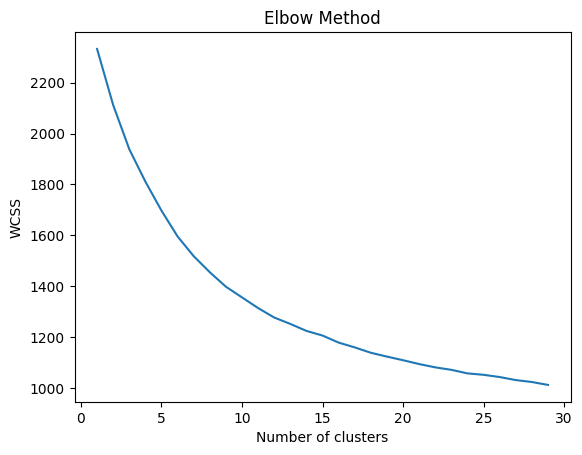

In [ ]:
#find the optimal k using the elbow method
wcss = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_word_vectors)
    wcss.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()
# According to the elbow method, after k=4, the decrease in inertia begins to slow.

In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reduced_word_vectors)
labels = kmeans.labels_

In [ ]:
# find out the intertia of the CURRENT kmeans model
kmeans.inertia_

1356.4066322695228

### key_words labels mapping table

In [ ]:
processed_words_series = pd.Series(processed_words)
df_processed_words = pd.DataFrame(processed_words_series, columns=['processed_words'])
df_processed_words.head()

,processed_words
0,mk ultra
1,modernism
2,storekeeper
3,rage and hate
4,anxiety disorder


In [ ]:
reduced_word_vectors_lst = reduced_word_vectors.tolist()
words_vectors_series = pd.Series(reduced_word_vectors_lst)
df_processed_words['word_vector'] = words_vectors_series
df_processed_words.head()

,processed_words,word_vector
0,mk ultra,"[-0.11440861283487039, -0.1247577055964355, 0...."
1,modernism,"[-0.002406809623943921, 0.2390312867813969, -0..."
2,storekeeper,"[-0.1213925561097048, -0.1270630459473534, -0...."
3,rage and hate,"[0.19578581949368418, 0.11108312558541715, 0.0..."
4,anxiety disorder,"[0.18386827823900032, 0.11344371605146812, -0...."


In [ ]:
# make sure each word find its corresponding word vector
df_processed_words.isna().sum()

processed_words    0
word_vector        0
dtype: int64

In [ ]:
df_processed_words.shape

(16416, 2)

In [ ]:
lables_series = pd.Series(labels)
lables_series.shape

(16416,)

In [ ]:
df_processed_words['label'] = lables_series
df_processed_words.head()

,processed_words,word_vector,label
0,mk ultra,"[-0.11440861283487039, -0.1247577055964355, 0....",8
1,modernism,"[-0.002406809623943921, 0.2390312867813969, -0...",1
2,storekeeper,"[-0.1213925561097048, -0.1270630459473534, -0....",3
3,rage and hate,"[0.19578581949368418, 0.11108312558541715, 0.0...",2
4,anxiety disorder,"[0.18386827823900032, 0.11344371605146812, -0....",0


In [ ]:
graph: bar chart of the number of words in each cluster

In [ ]:
# check if each cluster has appropraiet number of words
label_counts = df_processed_words['label'].value_counts()

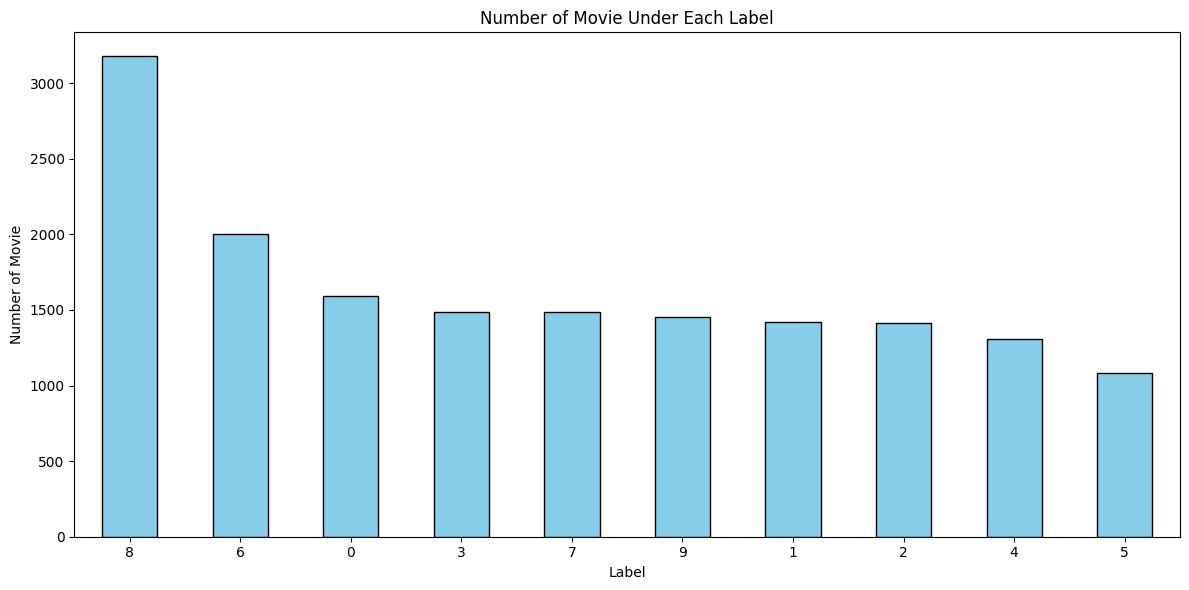

In [ ]:

plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movie Under Each Label')
plt.xlabel('Label')
plt.ylabel('Number of Movie')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# dummy encoding using label
df_processed_words_getdummies = pd.get_dummies(df_processed_words, columns=['label'])
df_processed_words_getdummies = pd.concat([df_processed_words_getdummies.reset_index(drop=True), df_processed_words['label'].reset_index(drop=True)], axis=1)
df_processed_words_getdummies.head()

,processed_words,word_vector,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label
0,mk ultra,"[-0.11440861283487039, -0.1247577055964355, 0....",False,False,False,False,False,False,False,False,True,False,8
1,modernism,"[-0.002406809623943921, 0.2390312867813969, -0...",False,True,False,False,False,False,False,False,False,False,1
2,storekeeper,"[-0.1213925561097048, -0.1270630459473534, -0....",False,False,False,True,False,False,False,False,False,False,3
3,rage and hate,"[0.19578581949368418, 0.11108312558541715, 0.0...",False,False,True,False,False,False,False,False,False,False,2
4,anxiety disorder,"[0.18386827823900032, 0.11344371605146812, -0....",True,False,False,False,False,False,False,False,False,False,0


In [ ]:
path_keywords_label = 'keywords_label_mapping.csv'
df_processed_words_getdummies.to_csv(path_keywords_label, index=False)

In [ ]:
path_keywords_label = 'keywords_label_mapping.csv'
df_processed_words_getdummies = pd.read_csv(path_keywords_label)

### key_words label mapping

In [ ]:
features_new.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film


In [ ]:
features_encoded['keywords_list'] = features_new['keywords'].apply(lambda x: x.split(', '))
features_encoded.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,keywords_list
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[rescue, mission, dream, airplane, paris, fran..."
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"[rescue, future, spacecraft, race against time..."
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,"[joker, sadism, chaos, secret identity, crime ..."
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,"[future, society, culture clash, space travel,..."
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[new york city, superhero, shield, based on co..."


In [ ]:
# filter out movies that only contain words in processed_words
# take about 3 to 4 mins
def filter_keywords(row):
    if isinstance(row['keywords_list'], list):
        return [word for word in row['keywords_list'] if word in processed_words]
    else:
        return []
features_encoded['keywords_list_processed'] = features_encoded.apply(filter_keywords, axis=1)
features_encoded.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,keywords_list,keywords_list_processed
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[rescue, mission, dream, airplane, paris, fran...","[rescue, mission, dream, airplane, paris, fran..."
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"[rescue, future, spacecraft, race against time...","[rescue, future, spacecraft, race against time..."
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,"[joker, sadism, chaos, secret identity, crime ...","[joker, sadism, chaos, secret identity, crime ..."
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,"[future, society, culture clash, space travel,...","[future, society, culture clash, space travel,..."
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[new york city, superhero, shield, based on co...","[new york city, superhero, shield, based on co..."


In [ ]:
features_encoded.columns

Index(['id', 'title', 'vote_average', 'release_date', 'runtime', 'adult',
       'original_language', 'overview', 'tagline', 'keywords',
       'era_Blockbuster Era', 'era_Digital Era', 'era_Golden Age',
       'era_Post-War Era', 'era_The Silent Era',
       'runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film',
       'runtime_type_Feature Film', 'runtime_type_Featurette',
       'runtime_type_Short Film', 'era', 'runtime_type', 'Comedy', 'Music',
       'Western', 'Action', 'Mystery', 'Documentary', 'Family', 'History',
       'unknown', 'Fantasy', 'War', 'TV Movie', 'Thriller', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Animation', 'Romance', 'Adventure',
       'keywords_list', 'keywords_list_processed'],
      dtype='object')

In [ ]:
# filter out movies that only contain words in processed_words, keep the index of the original dataframe as an extra column
df_keywords_processed = features_encoded[features_encoded['keywords_list_processed'].apply(len) > 0]
df_keywords_processed.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,keywords_list,keywords_list_processed
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[rescue, mission, dream, airplane, paris, fran...","[rescue, mission, dream, airplane, paris, fran..."
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"[rescue, future, spacecraft, race against time...","[rescue, future, spacecraft, race against time..."
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,"[joker, sadism, chaos, secret identity, crime ...","[joker, sadism, chaos, secret identity, crime ..."
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,"[future, society, culture clash, space travel,...","[future, society, culture clash, space travel,..."
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[new york city, superhero, shield, based on co...","[new york city, superhero, shield, based on co..."


In [ ]:
# sample 10000 rows from df_keywords_processed
df_keywords_processe_sample_all = df_keywords_processed
df_keywords_processe_sample_all

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,keywords_list,keywords_list_processed
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[rescue, mission, dream, airplane, paris, fran...","[rescue, mission, dream, airplane, paris, fran..."
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"[rescue, future, spacecraft, race against time...","[rescue, future, spacecraft, race against time..."
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,"[joker, sadism, chaos, secret identity, crime ...","[joker, sadism, chaos, secret identity, crime ..."
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,"[future, society, culture clash, space travel,...","[future, society, culture clash, space travel,..."
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"[new york city, superhero, shield, based on co...","[new york city, superhero, shield, based on co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716044,764577,stix and stones,0.000,2020-11-15,2,False,English,As the ice age dawned and the first snows bega...,unknown,unknown,False,True,False,False,False,False,False,False,False,True,Digital Era,Short Film,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,[unknown],[unknown]
716045,764579,muzaffaruddin shah in celebration of eid gol,0.000,1900-08-14,4,False,Persian,this film is a documentary about the trip of M...,unknown,unknown,False,False,False,False,True,False,False,False,False,True,The Silent Era,Short Film,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[unknown],[unknown]
716046,764580,tabyog,0.000,2019-05-09,14,False,Tagalog,Ondo is an ingenious man with a perilous job a...,unknown,unknown,False,True,False,False,False,False,False,False,False,True,Digital Era,Short Film,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[unknown],[unknown]
716047,764583,el heroe verdadero: don antonio bautista,0.000,2019-09-11,15,False,Tagalog,This documentary begins in 1878 until the fina...,unknown,unknown,False,True,False,False,False,False,False,False,False,True,Digital Era,Short Film,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[unknown],[unknown]


In [ ]:
path_sample_all = 'sample_all.csv'
df_keywords_processe_sample_all.to_csv(path_sample_all, index=False)

In [ ]:
path_sample_all = 'sample_all.csv'
df_keywords_processe_sample_all = pd.read_csv(path_sample_all)

In [ ]:
import polars as pl
import ast

In [ ]:
df_processed_words_getdummies.head()

,processed_words,word_vector,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label
0,mk ultra,"[-0.11440861283487039, -0.1247577055964355, 0....",False,False,False,False,False,False,False,False,True,False,8
1,modernism,"[-0.002406809623943921, 0.2390312867813969, -0...",False,True,False,False,False,False,False,False,False,False,1
2,storekeeper,"[-0.1213925561097048, -0.1270630459473534, -0....",False,False,False,True,False,False,False,False,False,False,3
3,rage and hate,"[0.19578581949368418, 0.11108312558541715, 0.0...",False,False,True,False,False,False,False,False,False,False,2
4,anxiety disorder,"[0.18386827823900032, 0.11344371605146812, -0....",True,False,False,False,False,False,False,False,False,False,0


In [ ]:
search_df = pl.read_csv("keywords_label_mapping.csv")
movie_df = pl.read_csv("sample_all.csv")

label_lookup = dict(zip(search_df['processed_words'], search_df['label']))
print(len(list(label_lookup.keys())))

movie_df = movie_df.with_columns([
    pl.col("keywords_list_processed").map_elements(lambda x: ast.literal_eval(x) if isinstance(x, str) else []).alias("keywords_list_processed")
])

def map_to_labels(keywords):
    label_lst = []
    for k in keywords:
        k = lemmatizer.lemmatize(k.lower())
        if k in label_lookup:
            label_i = label_lookup.get(k)
            label_lst.append(f'label_{label_i}')
    # print(label_lst)
    return label_lst

movie_df = movie_df.with_columns([
    pl.col("keywords_list_processed").map_elements(map_to_labels, return_dtype=pl.List(pl.Utf8)).alias("labels")
])

def label_count(labels):
    label_dict = {'label_0': 0,
                  'label_1': 0,
                  'label_2': 0,
                  'label_3': 0,
                  'label_4': 0,
                  'label_5': 0,
                  'label_6': 0,
                  'label_7': 0,
                  'label_8': 0,
                  'label_9': 0
                  }
    if not labels.is_empty():
        for label in labels:
            label_dict[label] = label_dict.get(label, 0) + 1
    return label_dict

movie_df = movie_df.with_columns([
    pl.col("labels").map_elements(label_count, return_dtype=pl.Object).alias("label_count_dict")
])
print(movie_df)

16159


sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredict

shape: (709_880, 46)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ id     ┆ title      ┆ vote_avera ┆ release_d ┆ … ┆ keywords_ ┆ keywords_ ┆ labels    ┆ label_cou │
│ ---    ┆ ---        ┆ ge         ┆ ate       ┆   ┆ list      ┆ list_proc ┆ ---       ┆ nt_dict   │
│ i64    ┆ str        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ essed     ┆ list[str] ┆ ---       │
│        ┆            ┆ f64        ┆ str       ┆   ┆ str       ┆ ---       ┆           ┆ object    │
│        ┆            ┆            ┆           ┆   ┆           ┆ list[str] ┆           ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 27205  ┆ inception  ┆ 8.364      ┆ 2010-07-1 ┆ … ┆ ['rescue' ┆ ["rescue" ┆ ["label_5 ┆ {'label_0 │
│        ┆            ┆            ┆ 5         ┆   ┆ , 'missio ┆ , "missio ┆ ", "label ┆ ': 1, 'la │
│        ┆            ┆            ┆           ┆   ┆ n',       ┆ n", …

In [ ]:
label_counts = list(movie_df['label_count_dict'])

In [ ]:
# Convert the list of dictionaries to a DataFrame
df_label_counts = pd.DataFrame(label_counts)
df_sample_keyword_mapping = pd.concat([df_keywords_processe_sample_all, df_label_counts], axis=1)
df_sample_keyword_mapping.head()

,id,title,vote_average,release_date,runtime,adult,original_language,overview,tagline,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,era,runtime_type,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,keywords_list,keywords_list_processed,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,27205,inception,8.364,2010-07-15,148,False,English,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"['rescue', 'mission', 'dream', 'airplane', 'pa...","['rescue', 'mission', 'dream', 'airplane', 'pa...",1,2,4,0,0,3,1,3,5,1
1,157336,interstellar,8.417,2014-11-05,169,False,English,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"['rescue', 'future', 'spacecraft', 'race again...","['rescue', 'future', 'spacecraft', 'race again...",3,2,4,2,3,1,2,3,12,0
2,155,the dark knight,8.512,2008-07-16,152,False,English,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,"['joker', 'sadism', 'chaos', 'secret identity'...","['joker', 'sadism', 'chaos', 'secret identity'...",2,2,1,2,0,4,5,0,1,0
3,19995,avatar,7.573,2009-12-15,162,False,English,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,"['future', 'society', 'culture clash', 'space ...","['future', 'society', 'culture clash', 'space ...",0,0,6,0,2,0,4,0,5,3
4,24428,the avengers,7.710,2012-04-25,143,False,English,When an unexpected enemy emerges and threatens...,Some assembly required.,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,Digital Era,Extended Feature Film,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,"['new york city', 'superhero', 'shield', 'base...","['new york city', 'superhero', 'shield', 'base...",2,2,0,0,0,0,4,1,0,0


In [ ]:
df_sample_keyword_mapping.columns

Index(['id', 'title', 'vote_average', 'release_date', 'runtime', 'adult',
       'original_language', 'overview', 'tagline', 'keywords',
       'era_Blockbuster Era', 'era_Digital Era', 'era_Golden Age',
       'era_Post-War Era', 'era_The Silent Era',
       'runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film',
       'runtime_type_Feature Film', 'runtime_type_Featurette',
       'runtime_type_Short Film', 'era', 'runtime_type', 'Comedy', 'Music',
       'Western', 'Action', 'Mystery', 'Documentary', 'Family', 'History',
       'unknown', 'Fantasy', 'War', 'TV Movie', 'Thriller', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Animation', 'Romance', 'Adventure',
       'keywords_list', 'keywords_list_processed', 'label_0', 'label_1',
       'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7',
       'label_8', 'label_9'],
      dtype='object')

In [ ]:
path_finish_dummy_encoding = 'df_finish_dummy_encoding.csv'
df_sample_keyword_mapping.to_csv(path_finish_dummy_encoding, index=False)

In [ ]:
path_finish_dummy_encoding = 'df_finish_dummy_encoding.csv'
df_sample_keyword_mapping = pd.read_csv(path_finish_dummy_encoding)

# Feature Vector

In [ ]:
# drop columns that are not needed for feature vector
df_feature_vector_final=df_sample_keyword_mapping.drop(['id','vote_average', 'release_date', 'runtime','original_language', 'overview', 'tagline', 'keywords', 'era', 'runtime_type', 'keywords_list','keywords_list_processed'],axis=1)
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,4,0,0,3,1,3,5,1
1,interstellar,False,False,True,False,False,False,False,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,3,2,4,2,3,1,2,3,12,0
2,the dark knight,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,2,1,2,0,4,5,0,1,0
3,avatar,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,6,0,2,0,4,0,5,3
4,the avengers,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,0,0,0,0,4,1,0,0


In [ ]:
# set title as index
df_feature_vector_final.set_index('title', inplace=True)
df_feature_vector_final.head()

,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inception,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,4,0,0,3,1,3,5,1
interstellar,False,False,True,False,False,False,False,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,3,2,4,2,3,1,2,3,12,0
the dark knight,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,2,1,2,0,4,5,0,1,0
avatar,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,6,0,2,0,4,0,5,3
the avengers,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,0,0,0,0,4,1,0,0


In [ ]:
path_feature_vector = 'df_feature_vector_final.csv'
df_feature_vector_final.to_csv(path_feature_vector)

In [ ]:
# import encoded dataframe
path_feature_vector = 'df_feature_vector_final.csv'
df_feature_vector_final = pd.read_csv(path_feature_vector)
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,4,0,0,3,1,3,5,1
1,interstellar,False,False,True,False,False,False,False,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,3,2,4,2,3,1,2,3,12,0
2,the dark knight,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,2,1,2,0,4,5,0,1,0
3,avatar,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,6,0,2,0,4,0,5,3
4,the avengers,False,False,True,False,False,False,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,0,0,0,0,4,1,0,0


In [ ]:
# drop any null values
df_feature_vector_final.dropna(inplace=True)
df_feature_vector_final.shape

(709880, 42)

In [ ]:
# drop any duplicates
df_feature_vector_final.drop_duplicates(inplace=True)
df_feature_vector_final.shape

(699325, 42)

In [ ]:
df_feature_vector_final.columns

Index(['title', 'adult', 'era_Blockbuster Era', 'era_Digital Era',
       'era_Golden Age', 'era_Post-War Era', 'era_The Silent Era',
       'runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film',
       'runtime_type_Feature Film', 'runtime_type_Featurette',
       'runtime_type_Short Film', 'Comedy', 'Music', 'Western', 'Action',
       'Mystery', 'Documentary', 'Family', 'History', 'unknown', 'Fantasy',
       'War', 'TV Movie', 'Thriller', 'Crime', 'Drama', 'Horror',
       'Science Fiction', 'Animation', 'Romance', 'Adventure', 'label_0',
       'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6',
       'label_7', 'label_8', 'label_9'],
      dtype='object')

## feature vector normalization

In [ ]:
# relabel genre columns so that rating in different genres would sum up to 1
genre_columns = ['Animation', 'Fantasy', 'Music', 'Western',
                 'Crime', 'Horror', 'Adventure', 'Drama', 'Family', 'Thriller',
                 'Romance', 'unknown', 'Action', 'Comedy', 'History', 'Documentary',
                 'Mystery', 'War', 'Science Fiction', 'TV Movie']
df_feature_vector_final[genre_columns] = df_feature_vector_final[genre_columns].div(df_feature_vector_final[genre_columns].sum(axis=1), axis=0)
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,1,2,4,0,0,3,1,3,5,1
1,interstellar,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.333333,0.0,0.333333,0.0,0.0,0.333333,3,2,4,2,3,1,2,3,12,0
2,the dark knight,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.250000,0.0,0.000000,0.0,0.0,0.000000,2,2,1,2,0,4,5,0,1,0
3,avatar,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.00,0.000000,0.0,0.250000,0.0,0.0,0.250000,0,0,6,0,2,0,4,0,5,3
4,the avengers,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,2,2,0,0,0,0,4,1,0,0


In [ ]:
label_columns = [f'label_{i}' for i in range(10)]
df_feature_vector_final[label_columns] = df_feature_vector_final[label_columns].div(df_feature_vector_final[label_columns].sum(axis=1), axis=0)
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.050000,0.100000,0.200000,0.000000,0.00000,0.150000,0.050000,0.150000,0.250000,0.05
1,interstellar,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.333333,0.0,0.333333,0.0,0.0,0.333333,0.093750,0.062500,0.125000,0.062500,0.09375,0.031250,0.062500,0.093750,0.375000,0.00
2,the dark knight,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.117647,0.117647,0.058824,0.117647,0.00000,0.235294,0.294118,0.000000,0.058824,0.00
3,avatar,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.00,0.000000,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.000000,0.300000,0.000000,0.10000,0.000000,0.200000,0.000000,0.250000,0.15
4,the avengers,False,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.222222,0.222222,0.000000,0.000000,0.00000,0.000000,0.444444,0.111111,0.000000,0.00


## assign weights for features

In [ ]:
# adult times 4, era times 2, runtime times 1, genres times 4, keywords times 5
df_feature_vector_final['adult'] = df_feature_vector_final['adult']*4
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,0,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.050000,0.100000,0.200000,0.000000,0.00000,0.150000,0.050000,0.150000,0.250000,0.05
1,interstellar,0,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.333333,0.0,0.333333,0.0,0.0,0.333333,0.093750,0.062500,0.125000,0.062500,0.09375,0.031250,0.062500,0.093750,0.375000,0.00
2,the dark knight,0,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.117647,0.117647,0.058824,0.117647,0.00000,0.235294,0.294118,0.000000,0.058824,0.00
3,avatar,0,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.00,0.000000,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.000000,0.300000,0.000000,0.10000,0.000000,0.200000,0.000000,0.250000,0.15
4,the avengers,0,False,True,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.222222,0.222222,0.000000,0.000000,0.00000,0.000000,0.444444,0.111111,0.000000,0.00


In [ ]:
era_columns = ['era_Digital Era', 'era_Blockbuster Era', 'era_Golden Age', 'era_Post-War Era', 'era_The Silent Era']
df_feature_vector_final[era_columns] = df_feature_vector_final[era_columns]*2
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,0,0,2,0,0,0,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.050000,0.100000,0.200000,0.000000,0.00000,0.150000,0.050000,0.150000,0.250000,0.05
1,interstellar,0,0,2,0,0,0,False,True,False,False,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.333333,0.0,0.333333,0.0,0.0,0.333333,0.093750,0.062500,0.125000,0.062500,0.09375,0.031250,0.062500,0.093750,0.375000,0.00
2,the dark knight,0,0,2,0,0,0,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.117647,0.117647,0.058824,0.117647,0.00000,0.235294,0.294118,0.000000,0.058824,0.00
3,avatar,0,0,2,0,0,0,False,True,False,False,False,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.00,0.000000,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.000000,0.300000,0.000000,0.10000,0.000000,0.200000,0.000000,0.250000,0.15
4,the avengers,0,0,2,0,0,0,False,True,False,False,False,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.222222,0.222222,0.000000,0.000000,0.00000,0.000000,0.444444,0.111111,0.000000,0.00


In [ ]:
runtime_columns = ['runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film', 'runtime_type_Feature Film', 'runtime_type_Featurette', 'runtime_type_Short Film']
df_feature_vector_final[runtime_columns] = df_feature_vector_final[runtime_columns]*1
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.050000,0.100000,0.200000,0.000000,0.00000,0.150000,0.050000,0.150000,0.250000,0.05
1,interstellar,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.333333,0.0,0.333333,0.0,0.0,0.333333,0.093750,0.062500,0.125000,0.062500,0.09375,0.031250,0.062500,0.093750,0.375000,0.00
2,the dark knight,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.117647,0.117647,0.058824,0.117647,0.00000,0.235294,0.294118,0.000000,0.058824,0.00
3,avatar,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.00,0.00,0.000000,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.000000,0.300000,0.000000,0.10000,0.000000,0.200000,0.000000,0.250000,0.15
4,the avengers,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.222222,0.222222,0.000000,0.000000,0.00000,0.000000,0.444444,0.111111,0.000000,0.00


In [ ]:
df_feature_vector_final[genre_columns] = df_feature_vector_final[genre_columns]*4
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.333333,0.0,0.0,1.333333,0.050000,0.100000,0.200000,0.000000,0.00000,0.150000,0.050000,0.150000,0.250000,0.05
1,interstellar,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,1.333333,0.0,0.0,1.333333,0.093750,0.062500,0.125000,0.062500,0.09375,0.031250,0.062500,0.093750,0.375000,0.00
2,the dark knight,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.117647,0.117647,0.058824,0.117647,0.00000,0.235294,0.294118,0.000000,0.058824,0.00
3,avatar,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0.000000,0.300000,0.000000,0.10000,0.000000,0.200000,0.000000,0.250000,0.15
4,the avengers,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.333333,0.0,0.0,1.333333,0.222222,0.222222,0.000000,0.000000,0.00000,0.000000,0.444444,0.111111,0.000000,0.00


In [ ]:
label_columns = [f'label_{i}' for i in range(10)]
df_feature_vector_final[label_columns] = df_feature_vector_final[label_columns]*5
df_feature_vector_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.333333,0.0,0.0,1.333333,0.250000,0.500000,1.000000,0.000000,0.00000,0.750000,0.250000,0.750000,1.250000,0.25
1,interstellar,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,1.333333,0.0,0.0,1.333333,0.468750,0.312500,0.625000,0.312500,0.46875,0.156250,0.312500,0.468750,1.875000,0.00
2,the dark knight,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.588235,0.588235,0.294118,0.588235,0.00000,1.176471,1.470588,0.000000,0.294118,0.00
3,avatar,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0.000000,1.500000,0.000000,0.50000,0.000000,1.000000,0.000000,1.250000,0.75
4,the avengers,0,0,2,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.333333,0.0,0.0,1.333333,1.111111,1.111111,0.000000,0.000000,0.00000,0.000000,2.222222,0.555556,0.000000,0.00


## Standard Normalization

In [ ]:
# Normalization
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df_for_model_encoded_norm = scaler.fit_transform(df_feature_vector_final.drop('title',axis=1))
df_norm_df = pd.DataFrame(df_for_model_encoded_norm, columns=[x for x in df_feature_vector_final.columns if x not in 'title'])
df_norm_df.head()

,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,2.707934,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,-0.211223,-0.179569,-0.502969,-0.229618,3.889353,-0.239972,-0.2291,4.597086,0.245834,0.101900,1.655289,-0.225009,-0.270383,1.273288,0.153199,1.263316,-1.046066,0.244293
1,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,-0.201496,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,-0.211223,-0.179569,0.530330,-0.229618,3.889353,-0.239972,-0.2291,4.597086,0.639326,-0.060064,0.961274,0.196629,0.239795,0.121460,0.248140,0.712613,-0.758747,-0.194307
2,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,1.980577,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,1.903171,2.501470,0.272005,-0.229618,-0.141133,-0.239972,-0.2291,-0.146252,0.854258,0.178119,0.348907,0.568663,-0.270383,2.100608,2.007352,-0.205226,-1.485495,-0.194307
3,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,1.980577,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,3.064189,-0.100028,-0.155656,-0.211223,-0.179569,-0.502969,-0.229618,2.881732,-0.239972,-0.2291,3.411251,-0.203871,-0.330005,2.580642,-0.225009,0.273807,-0.181653,1.292498,-0.205226,-1.046066,1.121492
4,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,2.707934,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,-0.211223,-0.179569,-0.502969,-0.229618,3.889353,-0.239972,-0.2291,4.597086,1.794817,0.629784,-0.195418,-0.225009,-0.270383,-0.181653,3.149134,0.882583,-1.620704,-0.194307


In [ ]:
df_final = pd.concat([df_feature_vector_final['title'], df_norm_df], axis=1)
df_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,Comedy,Music,Western,Action,Mystery,Documentary,Family,History,unknown,Fantasy,War,TV Movie,Thriller,Crime,Drama,Horror,Science Fiction,Animation,Romance,Adventure,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,inception,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,2.707934,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,-0.211223,-0.179569,-0.502969,-0.229618,3.889353,-0.239972,-0.2291,4.597086,0.245834,0.101900,1.655289,-0.225009,-0.270383,1.273288,0.153199,1.263316,-1.046066,0.244293
1,interstellar,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,-0.201496,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,-0.211223,-0.179569,0.530330,-0.229618,3.889353,-0.239972,-0.2291,4.597086,0.639326,-0.060064,0.961274,0.196629,0.239795,0.121460,0.248140,0.712613,-0.758747,-0.194307
2,the dark knight,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,1.980577,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,1.903171,2.501470,0.272005,-0.229618,-0.141133,-0.239972,-0.2291,-0.146252,0.854258,0.178119,0.348907,0.568663,-0.270383,2.100608,2.007352,-0.205226,-1.485495,-0.194307
3,avatar,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,1.980577,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,3.064189,-0.100028,-0.155656,-0.211223,-0.179569,-0.502969,-0.229618,2.881732,-0.239972,-0.2291,3.411251,-0.203871,-0.330005,2.580642,-0.225009,0.273807,-0.181653,1.292498,-0.205226,-1.046066,1.121492
4,the avengers,-0.348708,-0.261333,0.568975,-0.273936,-0.31324,-0.148148,-0.152583,3.084111,-0.920372,-0.292557,-0.72522,-0.370969,-0.202619,-0.093236,2.707934,-0.135151,-0.439208,-0.156345,-0.123883,-0.643984,-0.142036,-0.100028,-0.155656,-0.211223,-0.179569,-0.502969,-0.229618,3.889353,-0.239972,-0.2291,4.597086,1.794817,0.629784,-0.195418,-0.225009,-0.270383,-0.181653,3.149134,0.882583,-1.620704,-0.194307


In [ ]:
df_final.set_index('title', inplace=True)

## features vector database

In [ ]:
# output the final dataframe to a csv file for a later use
path_final_standard_feature_vector = 'final_standard_feature_vector.csv'
df_final.to_csv(path_final_standard_feature_vector)

In [ ]:
path_final_standard_feature_vector = 'final_standard_feature_vector.csv'
df_final_standard_feature_vector = pd.read_csv(path_final_standard_feature_vector)

/var/folders/5h/3cqj29ds1jg67b8b15k1kjw80000gn/T/ipykernel_45693/1867827981.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final_standard_feature_vector = pd.read_csv(path_final_standard_feature_vector)


# Content Vector

In [ ]:
from langchain.docstore.document import Document
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores.faiss import FAISS

## creating content feature

In [ ]:
path_content_file = 'df_finish_dummy_encoding.csv'
df_content = pd.read_csv(path_content_file)

In [ ]:
df_content.columns

Index(['id', 'title', 'vote_average', 'release_date', 'runtime', 'adult',
       'original_language', 'overview', 'tagline', 'keywords',
       'era_Blockbuster Era', 'era_Digital Era', 'era_Golden Age',
       'era_Post-War Era', 'era_The Silent Era',
       'runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film',
       'runtime_type_Feature Film', 'runtime_type_Featurette',
       'runtime_type_Short Film', 'era', 'runtime_type', 'Comedy', 'Music',
       'Western', 'Action', 'Mystery', 'Documentary', 'Family', 'History',
       'unknown', 'Fantasy', 'War', 'TV Movie', 'Thriller', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Animation', 'Romance', 'Adventure',
       'keywords_list', 'keywords_list_processed', 'label_0', 'label_1',
       'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7',
       'label_8', 'label_9'],
      dtype='object')

In [ ]:
df_content['content'] = df_content.apply(lambda row: f"Title: {row['title']}. Overview: {row['overview']}", axis=1)

In [ ]:
df_content['content'][0]

'Title: inception. Overview: Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.'

In [ ]:
# creating LangChain document objects
movies = []

for index, row in df_content.iterrows():
    x = Document(page_content=str(row['content']),
                 metadata={
                     "movie": row['title'],
                     "language": row['original_language'],
                     "release_date": row['release_date'],
                     "overview": row['overview'],
                     "score": row['vote_average'],
                     "adult": row['adult']
                     })
    movies.append(x)

In [ ]:
len(movies)

709880

## content encoding using sentence transformer

In [ ]:
# specify embedding model (using huggingface sentence transformer)
# actually same as keywords encoding
embedding_model_name = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {"device": "cpu"} # if you have gpu, change cpu to cuda
embedding_model = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)

In [ ]:
# some test movie set
movie_set100 = movies[:100]
movie_set1000 = movies[:1000]
movie_set10000 = movies[:10000]
movie_set50000 = movies[:50000]
movie_set100000 = movies[:100000]
movie_set250000 = movies[:250000]


In [ ]:
# build vector database with embeddings encoded from movie documents
# 10000 movies: 9.64967679977417
# 50000 movies: 48.91844439506531
# 100000 movies: 98.78263711929321
# 250000 movies: 301.4776728153229
# 300000 movies: 314.8119201660156
start_time = time.time()
db = FAISS.from_documents(movie_set250000, embedding_model)
end_time = time.time()
print('encoding time:',end_time-start_time)
query = "Title: inception"
docs = db.similarity_search_with_score(query)
print('Retrieved docs:', docs)
print('Metadata of the most relevant document:', docs[0][0].metadata)

encoding time: 1005.5775091648102
Retrieved docs: [(Document(id='56c65142-1fbc-4966-b551-284af0de48ca', metadata={'movie': 'inception: music from the motion picture', 'language': 'English', 'release_date': '2010-12-07', 'overview': 'The Special Features Blu-ray disc contains a lossless DTS-HD MA 5.1 surround mix of the Inception soundtrack.', 'score': 6.0, 'adult': False}, page_content='Title: inception: music from the motion picture. Overview: The Special Features Blu-ray disc contains a lossless DTS-HD MA 5.1 surround mix of the Inception soundtrack.'), np.float32(0.8214179)), (Document(id='462c865e-735a-4743-a9f4-236564551df6', metadata={'movie': 'mask', 'language': 'Persian', 'release_date': '2021-08-04', 'overview': 'Directed by Nava Rezvani', 'score': 6.0, 'adult': False}, page_content='Title: mask. Overview: Directed by Nava Rezvani'), np.float32(0.89665365)), (Document(id='a018827a-4dcf-4ca4-9811-60ba3ce0d7f1', metadata={'movie': 'r-1', 'language': 'English', 'release_date': '1

In [ ]:
db_path = 'faiss_index_250k'
db.save_local(db_path)

# Recommendation

In [ ]:
# cos similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

In [ ]:
feature_vector_path = 'final_standard_feature_vector.csv'
movie_dataset_path = 'df_finish_dummy_encoding.csv'
db_path = 'faiss_index_250k'

In [ ]:
feature_vector = pd.read_csv(feature_vector_path, on_bad_lines='skip')
movie_dataset = pd.read_csv(movie_dataset_path, on_bad_lines='skip')
db_movie_dataset = movie_dataset.head(250000)

# specify embedding model (using huggingface sentence transformer)
# actually same as keywords encoding
embedding_model_name = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {"device": "cpu"} # if you have gpu, change cpu to cuda
embedding_model = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)


/var/folders/5h/3cqj29ds1jg67b8b15k1kjw80000gn/T/ipykernel_45693/1386610668.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  feature_vector = pd.read_csv(feature_vector_path, on_bad_lines='skip')


In [ ]:
db = FAISS.load_local(db_path, embeddings=embedding_model, allow_dangerous_deserialization=True)

In [ ]:
query = "Title: inception"
docs = db.similarity_search_with_score(query)
print('Retrieved docs:', docs)
print('Metadata of the most relevant document:', docs[0][0].metadata)

Retrieved docs: [(Document(id='56c65142-1fbc-4966-b551-284af0de48ca', metadata={'movie': 'inception: music from the motion picture', 'language': 'English', 'release_date': '2010-12-07', 'overview': 'The Special Features Blu-ray disc contains a lossless DTS-HD MA 5.1 surround mix of the Inception soundtrack.', 'score': 6.0, 'adult': False}, page_content='Title: inception: music from the motion picture. Overview: The Special Features Blu-ray disc contains a lossless DTS-HD MA 5.1 surround mix of the Inception soundtrack.'), np.float32(0.8214179)), (Document(id='462c865e-735a-4743-a9f4-236564551df6', metadata={'movie': 'mask', 'language': 'Persian', 'release_date': '2021-08-04', 'overview': 'Directed by Nava Rezvani', 'score': 6.0, 'adult': False}, page_content='Title: mask. Overview: Directed by Nava Rezvani'), np.float32(0.89665365)), (Document(id='a018827a-4dcf-4ca4-9811-60ba3ce0d7f1', metadata={'movie': 'r-1', 'language': 'English', 'release_date': '1927-01-02', 'overview': 'Directed 

In [ ]:
feature_vector.columns

Index(['title', 'adult', 'era_Blockbuster Era', 'era_Digital Era',
       'era_Golden Age', 'era_Post-War Era', 'era_The Silent Era',
       'runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film',
       'runtime_type_Feature Film', 'runtime_type_Featurette',
       'runtime_type_Short Film', 'Comedy', 'Music', 'Western', 'Action',
       'Mystery', 'Documentary', 'Family', 'History', 'unknown', 'Fantasy',
       'War', 'TV Movie', 'Thriller', 'Crime', 'Drama', 'Horror',
       'Science Fiction', 'Animation', 'Romance', 'Adventure', 'label_0',
       'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6',
       'label_7', 'label_8', 'label_9'],
      dtype='object')

In [ ]:
movie_dataset.columns

Index(['id', 'title', 'vote_average', 'release_date', 'runtime', 'adult',
       'original_language', 'overview', 'tagline', 'keywords',
       'era_Blockbuster Era', 'era_Digital Era', 'era_Golden Age',
       'era_Post-War Era', 'era_The Silent Era',
       'runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film',
       'runtime_type_Feature Film', 'runtime_type_Featurette',
       'runtime_type_Short Film', 'era', 'runtime_type', 'Comedy', 'Music',
       'Western', 'Action', 'Mystery', 'Documentary', 'Family', 'History',
       'unknown', 'Fantasy', 'War', 'TV Movie', 'Thriller', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Animation', 'Romance', 'Adventure',
       'keywords_list', 'keywords_list_processed', 'label_0', 'label_1',
       'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7',
       'label_8', 'label_9'],
      dtype='object')

In [ ]:
def calculate_similarities(title, db, feature_vector, db_movie_dataset):
    scaler = MinMaxScaler()
    feature_vector.fillna(0)
    db_movie_dataset.dropna
    # check given title exist in dataset or not
    title = title.strip().lower()
    title_df1 = feature_vector['title']
    title_df2 = db_movie_dataset['title']
    title_intersection = title_df2[title_df2.isin(title_df1)].drop_duplicates()
    if title not in set(title_intersection):
        raise ValueError(f"Title '{title}' not found in indices")

    # calculate sentence vector similarities
    try:
        k = 250000
        query_row = db_movie_dataset[db_movie_dataset['title']==title]
        query = f"Title: {query_row['title'][0]}. Overview: {query_row['overview'][0]}"
        print('query:')
        print(query)
        faiss_index = db.index
        query_vec = embedding_model.embed_query(query)
        query_vec = np.array(query_vec).reshape(1, -1).astype('float32')
        D, I = faiss_index.search(query_vec, k)
        stored_vecs = np.vstack([faiss_index.reconstruct(int(idx)) for idx in I[0]])
        stored_norms = np.linalg.norm(stored_vecs, axis=1)
        cosine_scores = np.dot(stored_vecs, query_vec.T).flatten() / stored_norms / np.linalg.norm(query_vec, axis=1)  # query norm = 1 (already normalized)
        docs = []
        for idx in I[0]:
            doc_id = db.index_to_docstore_id[idx]
            doc = db.docstore.search(doc_id)
            docs.append(doc)

        content_similarity = []
        for doc, cosine_score in zip(docs, cosine_scores):
            movie_metadata = {
                'title': doc.metadata['movie'],
                'content_similarity': round(cosine_score, 4),
                'rating': doc.metadata['score']
            }
            content_similarity.append(movie_metadata)
        df_content_similarity = pd.DataFrame(content_similarity)
        df_tmp = df_content_similarity['content_similarity'].to_numpy()
        size = df_tmp.shape[0]
        df_tmp = df_tmp.reshape(size, 1)
        df_content_similarity_norm = scaler.fit_transform(df_tmp)
        df_content_similarity_norm = pd.DataFrame(df_content_similarity_norm, columns=['content_similarity_norm'])
        df_content_similarity = pd.concat([df_content_similarity, df_content_similarity_norm], axis=1)
        # print(df_content_similarity)

    except Exception as e:
        print(f"Error during query: {e}")
        return None

    # calculate features vector similarities
    try:
        df_feature_similarity = feature_vector['title']
        given_movie_vector = feature_vector[feature_vector['title']==title].drop(columns=['title']).values
        if given_movie_vector.shape[0] == 0:
            raise ValueError(f"Title '{title}' not found in indices")
        if given_movie_vector.all()==0:
            raise ValueError(f"Title '{title}' not found in indices")
        given_movie_vector = given_movie_vector.reshape(1,-1)
        other_vectors = feature_vector.drop(columns=['title']).fillna(0.0).values
        mean_vector = np.mean(other_vectors, axis=0)
        other_vectors[np.all(other_vectors == 0, axis=1)] = mean_vector
        feature_vector_similarity = cosine_similarity(given_movie_vector, other_vectors)
        df_tmp = feature_vector_similarity.reshape(-1,1)
        # print(df_tmp)
        size = df_tmp.shape[0]
        df_feature_similarity_norm = scaler.fit_transform(df_tmp)
        df_feature_similarity_norm = pd.DataFrame(df_feature_similarity_norm, columns=['feature_similarity_norm'])
        df_feature_similarity = pd.concat([df_feature_similarity, df_feature_similarity_norm], axis=1)

    except Exception as e:
        print(f"Error during feature similarity calculation: {e}")
        return None

    df_merged = pd.merge(df_content_similarity, df_feature_similarity, on='title', how='inner')

    # get recommendation
    df_merged['similarity_score'] = (df_merged['content_similarity_norm'] + df_merged['feature_similarity_norm'])/2.0
    df_unique = df_merged.drop_duplicates(subset=['title', 'content_similarity'])
    df_top25 = df_unique.sort_values(by=['similarity_score'], ascending=[False]).head(20)
    df_top25 = df_top25[df_top25['title'] != title]
    df_top10 = df_top25.sort_values(by=['rating'], ascending=[False]).head(10)
    recommendation_title = df_top10['title'].astype(str)
    recommendation = db_movie_dataset[db_movie_dataset['title'].isin(set(recommendation_title))]
    recommendation = recommendation[['title', 'adult', 'keywords', 'original_language','overview', 'vote_average']]
    recommendation = pd.merge(recommendation, df_top10, on='title', how='inner')
    return recommendation, df_top10







In [ ]:
recommendation, similarities = calculate_similarities(
    title='inception',
    db=db,
    feature_vector=feature_vector,
    db_movie_dataset=db_movie_dataset)
recommendation

query:
Title: inception. Overview: Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person's idea into a target's subconscious.


,title,adult,keywords,original_language,overview,vote_average,content_similarity,rating,content_similarity_norm,feature_similarity_norm,similarity_score
0,interstellar,False,"rescue, future, spacecraft, race against time,...",English,The adventures of a group of explorers who mak...,8.417,0.2557,8.417,0.390717,0.914366,0.652541
1,iron man,False,"middle east, superhero, arms dealer, malibu, b...",English,"After being held captive in an Afghan cave, bi...",7.640,0.2035,7.640,0.347986,0.959963,0.653975
2,iron man 3,False,"california, war on terror, superhero, malibu, ...",English,When Tony Stark's world is torn apart by a for...,6.928,0.2006,6.928,0.345612,0.964778,0.655195
3,iron man 2,False,"technology, superhero, malibu, based on comic,...",English,With the world now aware of his dual life as t...,6.835,0.1972,6.835,0.342829,0.983280,0.663054
4,the matrix reloaded,False,"dying and death, future, mission, man vs machi...",English,Six months after the events depicted in The Ma...,7.039,0.3088,7.039,0.434185,0.922341,0.678263
5,the fifth element,False,"new york city, flying car, taxi, egypt, race a...",English,"In 2257, a taxi driver is unintentionally give...",7.530,0.3333,7.530,0.454240,0.857275,0.655758
6,the matrix revolutions,False,"dying and death, rescue, future, mission, man ...",English,The human city of Zion defends itself against ...,6.710,0.2266,6.710,0.366896,0.933250,0.650073
7,star trek into darkness,False,"spacecraft, friendship, sequel, alien, futuris...",English,When the crew of the Enterprise is called back...,7.328,0.2019,7.328,0.346676,0.970065,0.658371
8,the host,False,"based on novel or book, mass murder, dystopia,...",English,A parasitic alien soul is injected into the bo...,6.290,0.1970,6.982,0.342665,0.960259,0.651462
9,stargate,False,"egypt, teleportation, pyramid, space travel, u...",English,"An interstellar teleportation device, found in...",6.978,0.2028,6.978,0.347413,0.973603,0.660508


# Evaluation

In [ ]:
import copy

In [ ]:
def get_sample_titles(movie_dataset, n=100):

    movie_dataset_copy = copy.deepcopy(movie_dataset)
    df_title = movie_dataset_copy['title']
    df_title.dropna()
    df_title.drop_duplicates()
    title_lst = df_title.head(n).to_list()
    assert len(title_lst) == n

    return title_lst

def get_recommendations_sample_n(n=100):

    title_lst = get_sample_titles(db_movie_dataset, n)
    results = []
    start_time = time.time()
    for title in title_lst:
        result = calculate_similarities(
            title=title,
            db=db,
            feature_vector=feature_vector,
            db_movie_dataset=db_movie_dataset
            )
        results.append(result)

    end_time = time.time()
    print(f'Time for getting recommendations of {n} movies: {end_time-start_time}s')

    return title_lst, results

def get_max_min_avg_similarities(results):
    con_sim = []# (max, min, avg)
    fea_sim = []
    sim_score = []
    ratings = []
    for recommendation, similarity_table in results:
        content_similarity_lst = recommendation['content_similarity'].to_list()
        feature_similarity_lst = recommendation['feature_similarity'].to_list()#-------
        similarity_score_lst = recommendation['similarity_score'].to_list()
        rating_lst = recommendation['rating'].to_list()
        con_sim.append([max(content_similarity_lst), min(content_similarity_lst), sum(content_similarity_lst)/len(content_similarity_lst)])
        fea_sim.append([max(feature_similarity_lst), min(feature_similarity_lst), sum(feature_similarity_lst)/len(feature_similarity_lst)])
        sim_score.append([max(similarity_score_lst), min(similarity_score_lst), sum(similarity_score_lst)/len(similarity_score_lst)])
        ratings.append([max(rating_lst), min(rating_lst), sum(rating_lst)/len(rating_lst)])
    return {'content_sim': con_sim, 'feature_sim': fea_sim, 'similarity_score': sim_score, 'rating_info': ratings}

def get_max_min_avg_similarity_analysis(mma_dict):
    return {'con_sim_max_result': np.array(mma_dict['content_sim'])[:,0].mean(),
            'con_sim_min_result': np.array(mma_dict['content_sim'])[:,1].mean(),
            'con_sim_avg_result': np.array(mma_dict['content_sim'])[:,2].mean(),
            'fea_sim_max_result': np.array(mma_dict['feature_sim'])[:,0].mean(),
            'fea_sim_min_result': np.array(mma_dict['feature_sim'])[:,1].mean(),
            'fea_sim_avg_result': np.array(mma_dict['feature_sim'])[:,2].mean(),
            'sim_score_max_result': np.array(mma_dict['similarity_score'])[:,0].mean(),
            'sim_score_min_result': np.array(mma_dict['similarity_score'])[:,1].mean(),
            'sim_score_avg_result': np.array(mma_dict['similarity_score'])[:,2].mean(),
            'rating_max_result': np.array(mma_dict['rating_info'])[:,0].mean(),
            'rating_min_result': np.array(mma_dict['rating_info'])[:,1].mean(),
            'rating_avg_result': np.array(mma_dict['rating_info'])[:,2].mean()}

def get_top_n_avg_similarity_analysis(results, n=5):
    con_sim_n = []# (max, min, avg)
    fea_sim_n = []
    sim_score_n = []
    ratings_n = []
    for recommendation, similarity_table in results:
        content_similarity_lst = recommendation['content_similarity'].to_list()
        feature_similarity_lst = recommendation['feature_similarity'].to_list()#-------
        similarity_score_lst = recommendation['similarity_score'].to_list()
        rating_lst = recommendation['rating'].to_list()
        con_sim_n.append(content_similarity_lst[:n])
        fea_sim_n.append(feature_similarity_lst[:n])
        sim_score_n.append(similarity_score_lst[:n])
        ratings_n.append(rating_lst[:n])
    con_sim_avg = [(np.array(con_sim_n)[:,i]).mean() for i in range(n)]
    fea_sim_avg = [(np.array(fea_sim_n)[:,i]).mean() for i in range(n)]
    sim_score_avg = [(np.array(sim_score_n)[:,i]).mean() for i in range(n)]
    ratings_avg = [(np.array(ratings_n)[:,i]).mean() for i in range(n)]
    return {'con_sim_n_avg': con_sim_avg,
            'fea_sim_n_avg': fea_sim_avg,
            'sim_score_n_avg': sim_score_avg,
            'ratings_n_avg': ratings_avg
            }
def genre_hit_rate(title_lst, results):

    genre_truth = {}
    for title in title_lst:
        title_row = db_movie_dataset[db_movie_dataset['title']==title]
        genre_truth[title] = title_row['genre'].to_list()[0]

    hit_rate_lst = []

    for title, tmp in zip(title_lst, results):
        recommendation, similarity_table = tmp
        recommendation_copy = copy.deepcopy(recommendation)
        genres_for_title = set(genre_truth[title])
        genre_match_count = recommendation_copy['genre'].apply(lambda rec_genres: len(set(rec_genres) & genres_for_title) > 0).sum()
        hit_rate = genre_match_count / len(recommendation)
        # print(count)
        hit_rate_lst.append(hit_rate)
    return hit_rate_lst


In [ ]:
title_lst, results = get_recommendations_sample_n(100) # sample 100 movies
tmp = get_max_min_avg_similarities(results)
mma_aa = get_max_min_avg_similarity_analysis(tmp)
print(mma_aa)
topn_avg_a = get_top_n_avg_similarity_analysis(results, n=5)
print(topn_avg_a)
hr_lst = genre_hit_rate(title_lst, results) # hit rate based on genre
print(hr_lst)

Time for getting recommendations of 100 movies: 525.2122037410736s
{'con_sim_max_result': np.float64(0.5985960000753403), 'con_sim_min_result': np.float64(0.2555790000408888), 'con_sim_avg_result': np.float64(0.38446024174116356), 'fea_sim_max_result': np.float64(0.9541208110854797), 'fea_sim_min_result': np.float64(0.7376450328121846), 'fea_sim_avg_result': np.float64(0.8700212323533966), 'sim_score_max_result': np.float64(0.7778201698354132), 'sim_score_min_result': np.float64(0.6577907021306286), 'sim_score_avg_result': np.float64(0.6939056191890347), 'rating_max_result': np.float64(8.62813), 'rating_min_result': np.float64(6.6760399999999995), 'rating_avg_result': np.float64(7.439072465269686)}
{'con_sim_n_avg': [np.float64(0.4152779982984066), np.float64(0.4102140010893345), np.float64(0.41471499934792516), np.float64(0.4021699991822243), np.float64(0.4075289997458458)], 'fea_sim_n_avg': [np.float64(0.8796663168064093), np.float64(0.8696082096957468), np.float64(0.8840574176360266

0.8093818992998366


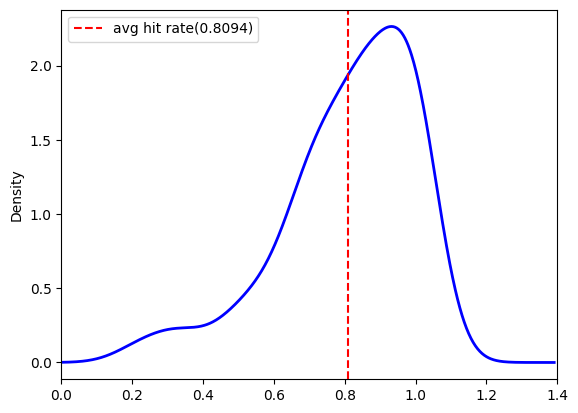

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

avg_hr = sum(hr_lst)/len(hr_lst)
s = pd.Series(hr_lst)
print(avg_hr)

# Plot density
s.plot.density(bw_method='scott', color='blue', linestyle='-', linewidth=2)
plt.axvline(x = avg_hr, color = 'r', linestyle='dashed', label = 'avg hit rate(0.8094)')
plt.xlim([0,1.4])
plt.legend()
plt.show()